# Protein Ligand Interaction Diagram Generator

## Essentially, this is a free protein preparation process, and at last, you will get the prepared structure named as 
```complex_prepared.pdb``` 
## while the 2D interaction is just inside this online notebook, you can copy and paste it anywhere you want.

- This workflow allows you to input a PDB bank protein-ligand co-crystal structure.
- The structure will be split and prepared separately
- The prepared structures then combined again
- The 2D interaction is a draw based on the merged structure
- The user is expected to provide the PDB ID and the ligand name as per in the PDB database, which is listed on the small molecule section of the PDB main page of the corresponding structure

# Install Conda

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

# Install dependencies

In [1]:
!conda install -c conda-forge openmm -y
!conda install -c conda-forge pdbfixer -y
!yes|conda install -c conda-forge pymol-open-source 2>&1 1>/dev/null
!conda install -c rdkit rdkit -y 2>&1 1>/dev/null
!conda install -q -y -c openbabel openbabel 2>&1 1>/dev/null
!conda install -c conda-forge mdanalysis 2>&1 1>/dev/null
!conda install -c conda-forge prolif 2>&1 1>/dev/null

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - openmm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.12.7  |       ha878542_0         143 KB  conda-forge
    certifi-2022.12.7          |     pyhd8ed1ab_0         147 KB  conda-forge
    colorama-0.4.6             |     pyhd8ed1ab_0          25 KB  conda-forge
    conda-23.1.0               |   py38h578d9bd_0         907 KB  conda-forge
    cudatoolkit-11.8.0         |      h37601d7_11       635.9 MB  conda-forge
    libblas-3.9.0              |16_linux64_openblas          13 KB  conda-forge
    libcblas-3.

In [10]:
! conda install conda==22.9.0 

Solving environment: / failed with initial frozen solve. Retrying with flexible solve.
Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / 

In [11]:
!conda install -c conda-forge pymol-open-source

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - 

In [2]:
import sys
import os
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import DataStructs
from rdkit.Chem import RDConfig
from rdkit.Chem import rdBase
print(rdBase.rdkitVersion)
from openbabel import pybel
import MDAnalysis as mda
import prolif as plf

2022.09.4


# Input

In [28]:
#@title Input expected from the user
PDB_ID = "3HTB" #@param {type:"string"}
pdb = PDB_ID + ".pdb"
! wget https://files.rcsb.org/download/$pdb
#@title Ligand three-letter name
Ligand = "JZ4" #@param {type:"string"}


--2023-03-06 05:21:50--  https://files.rcsb.org/download/3HTB.pdb
Resolving files.rcsb.org (files.rcsb.org)... 132.249.210.134
Connecting to files.rcsb.org (files.rcsb.org)|132.249.210.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘3HTB.pdb’

3HTB.pdb                [  <=>               ] 161.13K   408KB/s    in 0.4s    

2023-03-06 05:21:51 (408 KB/s) - ‘3HTB.pdb’ saved [164997]



# 🍸You can run all the rest at one time.

# Pymol script to split protein and ligand
Only Chain A retained

In [29]:
#@title Write out a script for pymol
com_file = open('split.pml','w')
com_file.write('''
load 3HTB.pdb
remove not chain A
remove resn HOH
h_add elem O or elem N
select 3HTB-JZ4, resn JZ4 #Create a selection called 1OYT-FSN from the ligand
select 3HTB-receptor, 3HTB and not 3HTB-JZ4 #Select all that is not the ligand
save 3HTB-JZ4.pdb, 3HTB-JZ4
save 3HTB-receptor.pdb, 3HTB-receptor    
''')
com_file.close()

In [30]:
#@title Correct the script with right PDB ID and ligand name
!sed -i 's/3HTB/{PDB_ID}/g' split.pml
!sed 's/JZ4/{Ligand}/g' split.pml
!sed -i 's/JZ4/{Ligand}/g' split.pml


load 3HTB.pdb
remove not chain A
remove resn HOH
h_add elem O or elem N
select 3HTB-JZ4, resn JZ4 #Create a selection called 1OYT-FSN from the ligand
select 3HTB-receptor, 3HTB and not 3HTB-JZ4 #Select all that is not the ligand
save 3HTB-JZ4.pdb, 3HTB-JZ4
save 3HTB-receptor.pdb, 3HTB-receptor    


In [31]:
#@title Run pymol to split protein and native ligand
!pymol -c split.pml

 PyMOL(TM) Molecular Graphics System, Version 2.5.0.
 Copyright (c) Schrodinger, LLC.
 All Rights Reserved.
 
    Created by Warren L. DeLano, Ph.D. 
 
    PyMOL is user-supported open-source software.  Although some versions
    are freely available, PyMOL is not in the public domain.
 
    If PyMOL is helpful in your work or study, then please volunteer 
    support for our ongoing efforts to create open and affordable scientific
    software by purchasing a PyMOL Maintenance and/or Support subscription.

    More information can be found at "http://www.pymol.org".
 
    Enter "help" for a list of commands.
    Enter "help <command-name>" for information on a specific command.

 Hit ESC anytime to toggle between text and graphics.

 Detected 2 CPU cores.  Enabled multithreaded rendering.
PyMOL>load 3HTB.pdb
HEADER    HYDROLASE                               11-JUN-09   3HTB
TITLE     2-PROPYLPHENOL IN COMPLEX WITH T4 LYSOZYME L99A/M102Q
COMPND    MOL_ID: 1;
COMPND   2 MOLECULE: LYSOZY

# Split protein and ligand are allocated to 2 variables, respectively

In [32]:
Protein_PDB_file_name = PDB_ID + '-receptor.pdb'
ligand_name = PDB_ID + '-' + Ligand + '.pdb'

# ligand name is to changed to LIG inside the ligand file

In [33]:
!sed -i 's/{Ligand}/LIG/g' {ligand_name}

# Prepare the protein

In [34]:
from pdbfixer import PDBFixer
from openmm.app import PDBFile
fixer = PDBFixer(filename=Protein_PDB_file_name)
fixer.findMissingResidues()
fixer.findNonstandardResidues()
fixer.replaceNonstandardResidues()
fixer.removeHeterogens(True)
fixer.findMissingAtoms()
fixer.addMissingAtoms()
fixer.addMissingHydrogens(7.0)
fixer.addSolvent(fixer.topology.getUnitCellDimensions())
PDBFile.writeFile(fixer.topology, fixer.positions, open('output.pdb', 'w'))

# Prepare the ligand
This give the ligand correct H atoms since they do not exist in PDB bank, also give ligand correct charges

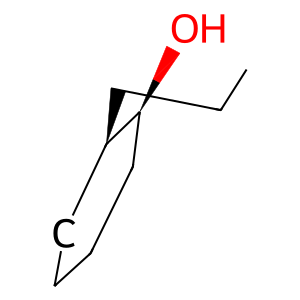

In [35]:
m=Chem.MolFromPDBFile(ligand_name)
Draw.MolToImage(m)

In [36]:
!obabel -ipdb {ligand_name} -omol2 -O ligand.mol2 -h

1 molecule converted


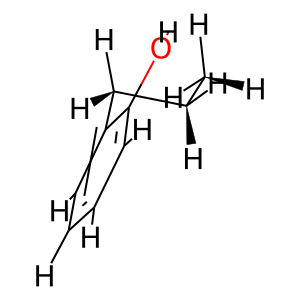

In [37]:
m=Chem.MolFromMol2File('ligand.mol2',sanitize=False)
Draw.MolToImage(m)

In [38]:
#mol= [m for m in pybel.readfile(filename='ligand.mol2',format='mol2')][0]
#mol.addh()
#out=pybel.Outputfile(filename='ligand2.mol2',format='mol2',overwrite=True)
#out.write(mol)
#out.close()

In [39]:
#m=Chem.MolFromMol2File('ligand2.mol2',sanitize=False)
#Draw.MolToImage(m)

In [40]:
!obabel -imol2 ligand.mol2 -opdb -O ligand2.pdb -h

1 molecule converted


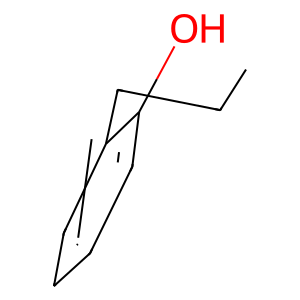

In [41]:
m=Chem.MolFromPDBFile('ligand2.pdb')
Draw.MolToImage(m)

In [42]:
# Save the ligand and prepared protein together

# Merge the prepared protein and ligand

In [43]:
#@title Write out a script for pymol
com_file = open('merge.pml','w')
com_file.write('''
load output.pdb
load ligand2.pdb
h_add elem O or elem N
save complex_prepared.pdb, all   
''')
com_file.close()

In [44]:
!pymol -c merge.pml

 PyMOL(TM) Molecular Graphics System, Version 2.5.0.
 Copyright (c) Schrodinger, LLC.
 All Rights Reserved.
 
    Created by Warren L. DeLano, Ph.D. 
 
    PyMOL is user-supported open-source software.  Although some versions
    are freely available, PyMOL is not in the public domain.
 
    If PyMOL is helpful in your work or study, then please volunteer 
    support for our ongoing efforts to create open and affordable scientific
    software by purchasing a PyMOL Maintenance and/or Support subscription.

    More information can be found at "http://www.pymol.org".
 
    Enter "help" for a list of commands.
    Enter "help <command-name>" for information on a specific command.

 Hit ESC anytime to toggle between text and graphics.

 Detected 2 CPU cores.  Enabled multithreaded rendering.
PyMOL>load output.pdb
 ObjectMolecule: Read crystal symmetry information.
 CmdLoad: "" loaded as "output".
PyMOL>load ligand2.pdb
COMPND    3HTB-JZ4.pdb
 CmdLoad: "" loaded as "ligand2".
PyMOL>h_add 

# Read the merged complex into MDAnalysis as an python object
Allocate two Rdkit variables to ligand and protein, respectively

In [45]:
import numpy as np
# load topology
u = mda.Universe('complex_prepared.pdb')
lig = u.select_atoms("resname LIG")
prot = u.select_atoms("protein")

# Draw a 2D ligand
This is done with Rdkit

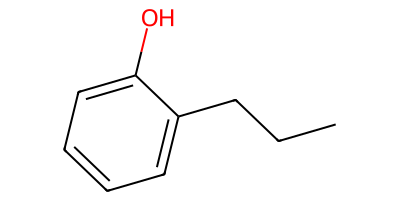

In [46]:
from rdkit import Chem
from rdkit.Chem import Draw

# create a molecule from the MDAnalysis selection
lmol = plf.Molecule.from_mda(lig)
# cleanup before drawing
mol = Chem.RemoveHs(lmol)
mol.RemoveAllConformers()
Draw.MolToImage(mol, size=(400, 200))

# Draw the 2D interaction between protein and ligand
This is done by ProLif

In [47]:
from prolif.plotting.network import LigNetwork

fp = plf.Fingerprint()
fp.run(u.trajectory[::10], lig, prot)
df = fp.to_dataframe(return_atoms=True)

net = LigNetwork.from_ifp(
    df,
    lmol,
    # replace with `kind="frame", frame=0` for the other depiction
    kind="aggregate",
    threshold=0.3,
    rotation=270,
)
net.display()

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/lib/python3.8/multiprocessing/reduction.py:51: UserWarning: Reader has no dt information, set to 1.0 ps
  cls(buf, protocol).dump(obj)


ValueError: ignored

In [ ]:
#@title 2. 👋 Write pymol script
com_file = open('image.pml','w')
com_file.write('''
load output.pdb, tmp
load Docked1.pdb, docked
#select the surrounding then set it to an object 
# find 5 angstroms around ligand
select resn UNL
select res, byres sele around 5
#set the ligand to an lig object
select lig, resn UNL
# Select all to hide
select all
# hide everythong
hide
# show the ligand and surroundings
show sticks, lig|res
# hide the H atom on the sticks
hide sticks, h.
# zoon on lig and res, background faded
zoom lig|res
# Color ligand carbon atom yellow
color yellow, lig&name C*
# Color ligand carbon atom yellow
color cyan, res&name C*
# Set label and font size
# note you still have to click "residues" form L dropdown menue to show the label
set label_size, 28
set label_font_id, 8
set label_color, grey
# We also define some hydrophobic interaction style
set sphere_scale, 0.35
set sphere_transparency, 0.3
set sphere_color, cyan
# Define some hydrogen bond. interaciton style
set dash_length, 0.3
set dash_radius, 0.08
set dash_gap, 0.3
# set backgroud white
bg_color white
show cartoon
set cartoon_transparency, 0.3
bg_color white
set ray_trace_mode, 1
png binding_pocket.png
save pre_pymol.pse
''')
com_file.close()


In [ ]:
#@title 4.👋 Generate a pymol session pse file that 70% quality of publication, please download to polish it more.
!pymol -c image.pml